```
\copy ( SELECT s.source_file_acquisition, COUNT(s.packet_id) FROM (SELECT DISTINCT source_file_acquisition, packet_id FROM spb_processing_v4_flatmap."event" WHERE source_data_type_num=1 ORDER BY source_file_acquisition ASC) AS s GROUP BY s.source_file_acquisition ORDER BY s.source_file_acquisition ASC ) TO '/mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt' with csv header delimiter as E'\t';
```

```
less /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt
less /home/spbproc/SPBDATA_flight/count_tevent_entries.txt 
cut -f1 /home/spbproc/SPBDATA_flight/count_tevent_entries.txt | head
cut -f2 /home/spbproc/SPBDATA_flight/count_tevent_entries.txt | head
cut -f2 /home/spbproc/SPBDATA_flight/count_tevent_entries.txt | head | xargs -n1 -I{} nc '{}/128'
cut -f2 /home/spbproc/SPBDATA_flight/count_tevent_entries.txt | head | xargs -n1 -I{} bc '{}/128'
cut -f2 /home/spbproc/SPBDATA_flight/count_tevent_entries.txt | head | xargs -n1 -I{} echo '{}/128' | bc
f=/home/spbproc/SPBDATA_flight/count_tevent_entries.txt; paste <(cut -f1 "$f")  <(cut -f2 "$f" | xargs -n1 -I{} echo '{}/128' | bc) | tee /home/spbproc/SPBDATA_flight/count_tevent_packets.txt
diff -y -W 400 /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt /home/spbproc/SPBDATA_flight/count_tevent_packets.txt
diff -y -W 200 /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt /home/spbproc/SPBDATA_flight/count_tevent_packets.txt | less
meld /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt /home/spbproc/SPBDATA_flight/count_tevent_packets.txt 
f=/home/spbproc/SPBDATA_flight/count_tevent_entries.txt; paste <(cut -f1 "$f" | xargs -l1 basename)  <(cut -f2 "$f" | xargs -n1 -I{} echo '{}/128' | bc) | tee /home/spbproc/SPBDATA_flight/count_sfa_tevent_packets.txt
meld /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt /home/spbproc/SPBDATA_flight/count_sfa_tevent_packets.txt 
meld /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt /home/spbproc/SPBDATA_flight/count_sfa_tevent_packets.txt 
meld <(sort -f /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt) <(sort -h /home/spbproc/SPBDATA_flight/count_sfa_tevent_packets.txt)
tail -n+2 /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt | head
meld <(tail -n+2 /mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt | sort -h) <(sort -h /home/spbproc/SPBDATA_flight/count_sfa_tevent_packets.txt)
```

In [1]:
import sys
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [3]:
db_df = pd.read_csv('/mnt/data_wdblue3d1/stuff/spb_processing_v4_flatmap_event_packet_count_by_file.txt', sep='\t')
files_df = pd.read_csv('/home/spbproc/SPBDATA_flight/count_sfa_tevent_packets.txt', sep='\t',
                       names=['source_file_acquisition', 'count'])

In [4]:
db_df.head()

,source_file_acquisition,count
0,allpackets-SPBEUSO-ACQUISITION-20170424-150143-001.001--CHECK.root,4
1,allpackets-SPBEUSO-ACQUISITION-20170424-150228-001.001--LONG.root,21
2,allpackets-SPBEUSO-ACQUISITION-20170424-150228-002.001--LONG.root,26
3,allpackets-SPBEUSO-ACQUISITION-20170424-150228-003.001--LONG.root,32
4,allpackets-SPBEUSO-ACQUISITION-20170424-150228-004.001--LONG.root,26


In [5]:
files_df.head()

,source_file_acquisition,count
0,allpackets-SPBEUSO-ACQUISITION-20170420-135400-001.001--CHECK.root,219
1,allpackets-SPBEUSO-ACQUISITION-20170420-135444-006.001--LONG.root,86
2,allpackets-SPBEUSO-ACQUISITION-20170420-135444-002.001--LONG.root,304
3,allpackets-SPBEUSO-ACQUISITION-20170420-160440-001.001--LONG.root,110
4,allpackets-SPBEUSO-ACQUISITION-20170420-160356-001.001--CHECK.root,34


In [6]:
merged_df = pd.merge(db_df, files_df, on='source_file_acquisition', how='outer', indicator=True, 
                     suffixes=('_in_db', '_in_files'))

In [7]:
merged_df.head()

,source_file_acquisition,count_in_db,count_in_files,_merge
0,allpackets-SPBEUSO-ACQUISITION-20170424-150143-001.001--CHECK.root,4.0,13,both
1,allpackets-SPBEUSO-ACQUISITION-20170424-150228-001.001--LONG.root,21.0,76,both
2,allpackets-SPBEUSO-ACQUISITION-20170424-150228-002.001--LONG.root,26.0,69,both
3,allpackets-SPBEUSO-ACQUISITION-20170424-150228-003.001--LONG.root,32.0,83,both
4,allpackets-SPBEUSO-ACQUISITION-20170424-150228-004.001--LONG.root,26.0,76,both


## Database - filesystem: Same counts 

In [8]:
same_counts_df =  merged_df.query('count_in_db == count_in_files')

In [9]:
same_counts_df

,source_file_acquisition,count_in_db,count_in_files,_merge
41,allpackets-SPBEUSO-ACQUISITION-20170425-122821-001.001--LONG.root,21.0,21,both
42,allpackets-SPBEUSO-ACQUISITION-20170425-122850-001.001--LONG.root,14.0,14,both
44,allpackets-SPBEUSO-ACQUISITION-20170425-123151-001.001--CHECK.root,26.0,26,both
52,allpackets-SPBEUSO-ACQUISITION-20170426-125845-001.001--CHECK.root,12.0,12,both
53,allpackets-SPBEUSO-ACQUISITION-20170426-125930-001.001--LONG.root,34.0,34,both
54,allpackets-SPBEUSO-ACQUISITION-20170426-125930-002.001--LONG.root,41.0,41,both
55,allpackets-SPBEUSO-ACQUISITION-20170426-125930-003.001--LONG.root,53.0,53,both
56,allpackets-SPBEUSO-ACQUISITION-20170426-125930-004.001--LONG.root,36.0,36,both
244,allpackets-SPBEUSO-ACQUISITION-20170427-162053-001.001--.root,5.0,5,both
245,allpackets-SPBEUSO-ACQUISITION-20170428-063224-001.001--LONG.root,7.0,7,both


In [10]:
len(same_counts_df)

91

## Database - filesystem: Different counts 

In [11]:
different_counts_df = merged_df.query('count_in_db != count_in_files and _merge=="both"').copy()

In [12]:
different_counts_df['count_difference'] = (different_counts_df['count_in_files'] - different_counts_df['count_in_db'])

In [13]:
len(different_counts_df)

947

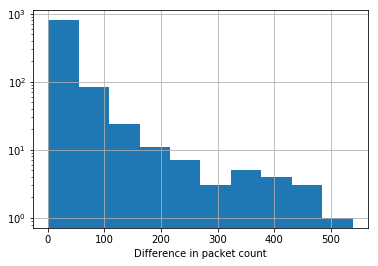

In [14]:
fig, ax = plt.subplots()
different_counts_df['count_difference'].hist(ax=ax)
ax.set_xlabel('Difference in packet count')
ax.set_yscale('log')
plt.show()

In [15]:
different_counts_df.sort_values('count_difference', ascending=False).head(200)

,source_file_acquisition,count_in_db,count_in_files,_merge,count_difference
197,allpackets-SPBEUSO-ACQUISITION-20170427-125407-005.001--LONG-sqz-dis.root,48.0,586,both,538.0
107,allpackets-SPBEUSO-ACQUISITION-20170427-082554-002.001--LONG-sqz.root,776.0,1224,both,448.0
106,allpackets-SPBEUSO-ACQUISITION-20170427-082554-001.001--LONG-sqz.root,761.0,1203,both,442.0
108,allpackets-SPBEUSO-ACQUISITION-20170427-082554-003.001--LONG-sqz.root,714.0,1149,both,435.0
110,allpackets-SPBEUSO-ACQUISITION-20170427-082554-005.001--LONG-sqz.root,735.0,1135,both,400.0
112,allpackets-SPBEUSO-ACQUISITION-20170427-082554-007.001--LONG-sqz.root,583.0,982,both,399.0
114,allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG-sqz.root,614.0,1008,both,394.0
116,allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG-sqz.root,639.0,1016,both,377.0
109,allpackets-SPBEUSO-ACQUISITION-20170427-082554-004.001--LONG-sqz.root,667.0,1041,both,374.0
111,allpackets-SPBEUSO-ACQUISITION-20170427-082554-006.001--LONG-sqz.root,659.0,1030,both,371.0


In [16]:
different_counts_df['count_difference'].sum() 

28901.0

## Database - filesystem: Only database

In [17]:
only_db_counts_df = merged_df.query('_merge=="left_only"')

In [18]:
len(only_db_counts_df)

0

## Database - filesystem: Only filesystem

In [19]:
only_files_counts_df = merged_df.query('_merge=="right_only"')

In [20]:
len(only_files_counts_df)

51

In [21]:
only_files_counts_df

,source_file_acquisition,count_in_db,count_in_files,_merge
1038,allpackets-SPBEUSO-ACQUISITION-20170420-135400-001.001--CHECK.root,NaN,219,right_only
1039,allpackets-SPBEUSO-ACQUISITION-20170420-135444-006.001--LONG.root,NaN,86,right_only
1040,allpackets-SPBEUSO-ACQUISITION-20170420-135444-002.001--LONG.root,NaN,304,right_only
1041,allpackets-SPBEUSO-ACQUISITION-20170420-160440-001.001--LONG.root,NaN,110,right_only
1042,allpackets-SPBEUSO-ACQUISITION-20170420-160356-001.001--CHECK.root,NaN,34,right_only
1043,allpackets-SPBEUSO-ACQUISITION-20170420-160440-002.001--LONG.root,NaN,101,right_only
1044,allpackets-SPBEUSO-ACQUISITION-20170421-135909-001.001--CHECK.root,NaN,306,right_only
1045,allpackets-SPBEUSO-ACQUISITION-20170425-122842-001.001--CHECK.root,NaN,1,right_only
1046,allpackets-SPBEUSO-ACQUISITION-20170425-122743-001.001--CHECK.root,NaN,1,right_only
1047,allpackets-SPBEUSO-ACQUISITION-20170425-122750-001.001--LONG.root,NaN,1,right_only


In [22]:
only_files_counts_df['count_in_files'].sum()

3348

## Non-processed packets

In [23]:
num_non_processed_packets = \
    different_counts_df['count_difference'].sum() + only_files_counts_df['count_in_files'].sum()

In [24]:
num_non_processed_packets

32249.0

In [25]:
files_df['count'].sum()

177897

In [26]:
num_non_processed_packets / files_df['count'].sum()

0.18127905473391906